In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

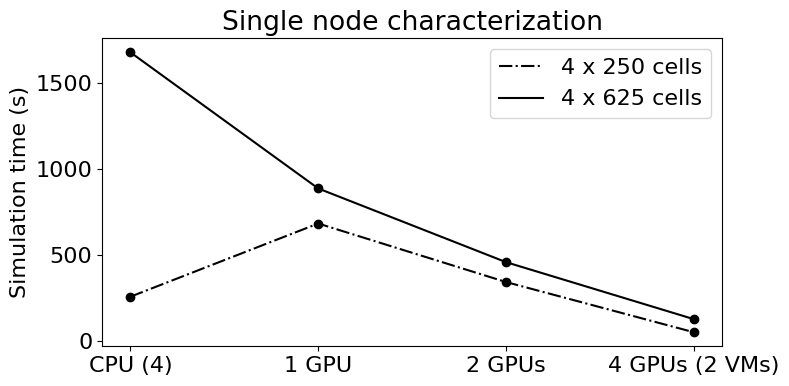

In [125]:
# Single node characterization
plt.rcParams.update({'font.size': 16})

xticks = ["CPU (4)", "1 GPU", "2 GPUs", "4 GPUs (2 VMs)"]

# 4 x 250 cells
trace1 = [255.163, 681.288, 340.579, 48.3546]

# 4 x 625 cells
trace2 = [1677.67, 885.244, 456.286, 124.496]

fig = plt.figure(figsize = (8, 4))
plt.plot(xticks, trace1, label = "4 x 250 cells", ls = '-.', c = 'black')
plt.scatter(xticks, trace1, c = 'black')
plt.plot(xticks, trace2, label = "4 x 625 cells", ls = '-', c = 'black')
plt.scatter(xticks, trace2, c = 'black')
plt.ylabel("Simulation time (s)")
plt.title('Single node characterization')
plt.legend()

fig.savefig("single_node_charac.svg", format = 'svg', bbox_inches = "tight")

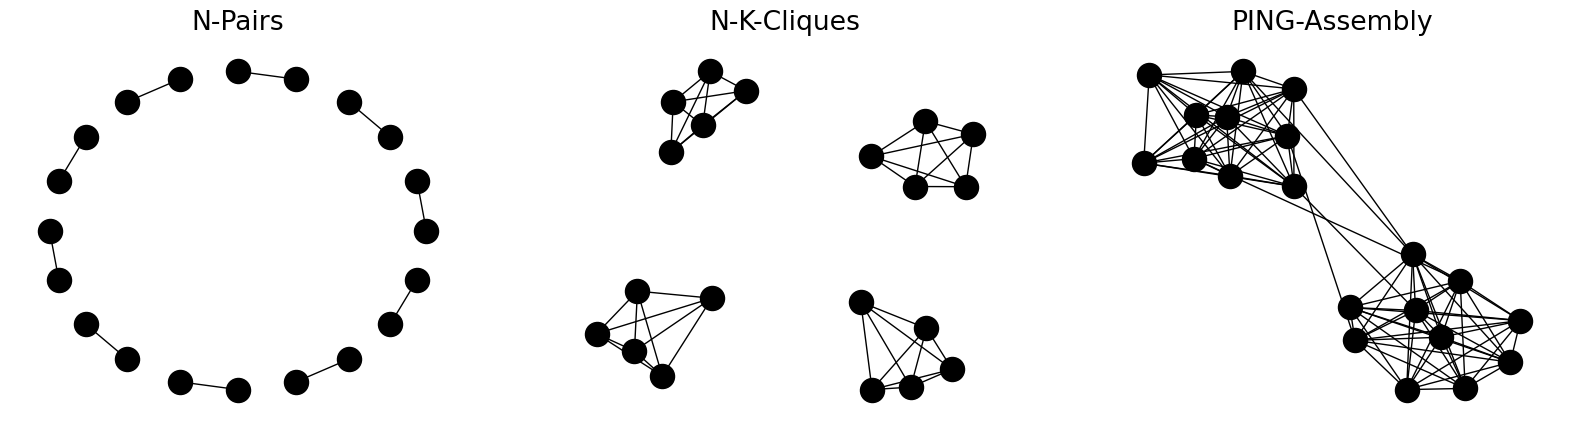

In [89]:
# Network graphs
graphs = []

for graph in ["10_pairs.txt", "4-5_cliques.txt", "PING-2-10.txt"]:
    with open(graph, "r") as file:
        lines = file.read()

    G = nx.Graph()
    for line in lines.split("\n"):
        numbers = line.split(",")
        G.add_edge(float(numbers[0]), float(numbers[1]), weight = float(numbers[2]))
    graphs.append(G)


fig, ax = plt.subplots(1, 3, figsize = (20, 5))
nx.draw_circular(graphs[0], ax = ax[0], node_color = "black")
nx.draw(graphs[1], pos = nx.spring_layout(graphs[1], k = 1.0), ax = ax[1], node_color = "black")
nx.draw(graphs[2], ax = ax[2], node_color = "black")

ax[0].set_title("N-Pairs")
ax[1].set_title("N-K-Cliques")
ax[2].set_title("PING-Assembly")

plt.show()

In [90]:
fig.savefig("networks.svg", format = 'svg', bbox_inches = "tight")

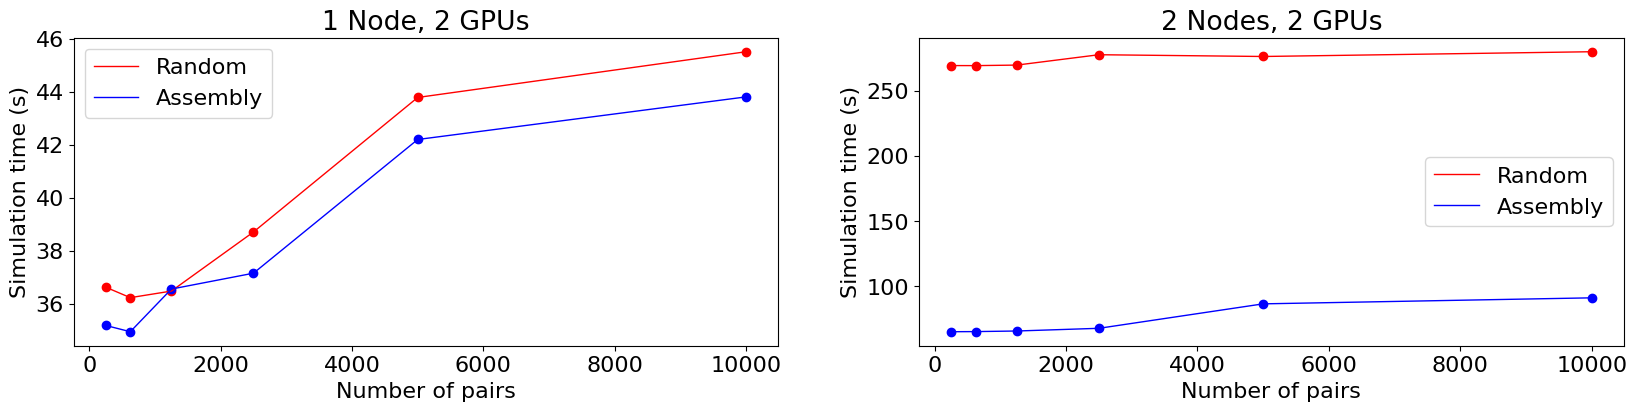

In [113]:
# N-Pairs

n_pairs = [250, 625, 1250, 2500, 5000, 10000]

# 1 Node, 2 GPUs
random_12 = [36.6203, 36.2246, 36.4728, 38.7023, 43.7776, 45.5033]
asm_12 = [35.1764, 34.9393, 36.5488, 37.1476, 42.1918, 43.7996]

# 2 Nodes, 2 GPUs
random_22 = [269.325, 269.295, 269.701, 277.661, 276.304, 279.967]
asm_22 = [64.8739, 64.9752, 65.4253, 67.5019, 86.2827, 90.9081]

fig, ax = plt.subplots(1, 2, figsize = (20, 4))

ax[0].plot(n_pairs, random_12, label = "Random", c = 'red', linewidth = 1)
ax[0].plot(n_pairs, asm_12, label = "Assembly", c = 'blue', linewidth = 1)
ax[0].scatter(n_pairs, random_12, c = 'red')
ax[0].scatter(n_pairs, asm_12, c = 'blue')
ax[0].set_xlabel("Number of pairs")
ax[0].set_ylabel("Simulation time (s)")
ax[0].set_title("1 Node, 2 GPUs")

ax[1].plot(n_pairs, random_22, label = "Random", c = 'red', linewidth = 1)
ax[1].plot(n_pairs, asm_22, label = "Assembly", c = 'blue', linewidth = 1)
ax[1].scatter(n_pairs, random_22, c = 'red')
ax[1].scatter(n_pairs, asm_22, c = 'blue')
ax[1].set_xlabel("Number of pairs")
ax[1].set_ylabel("Simulation time (s)")
ax[1].set_title("2 Nodes, 2 GPUs")

ax[0].legend()
ax[1].legend()

In [114]:
fig.savefig("pairs.svg", format = 'svg', bbox_inches = "tight")

Text(0.5, 0, 'Number of pairs')

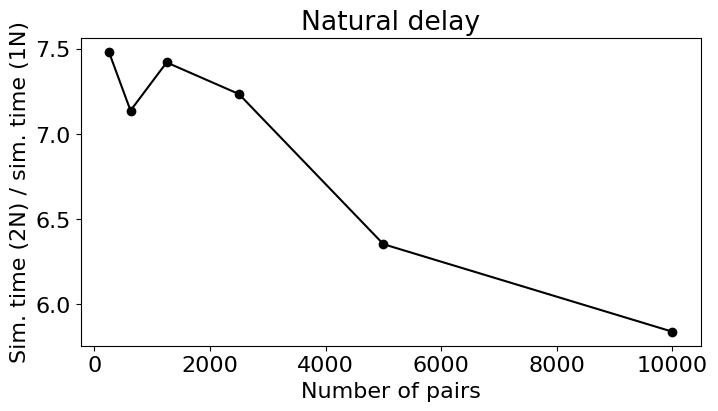

In [104]:
# Natural delay

n_pairs = [250, 625, 1250, 2500, 5000, 10000]
simt_2n = np.array([263.798, 264.115, 270.148, 266.542, 271.595, 275.756])
simt_1n = np.array([35.2545, 37.005, 36.4087, 36.8437, 42.7479, 47.2205])

fig = plt.figure(figsize = (8, 4))
plt.plot(n_pairs, simt_2n / simt_1n, c = 'black')
plt.scatter(n_pairs, simt_2n / simt_1n, c = 'black')
plt.ylabel("Sim. time (2N) / sim. time (1N)")
plt.title('Natural delay')
plt.xlabel("Number of pairs")

In [105]:
fig.savefig("nat_delay.svg", format = 'svg', bbox_inches = "tight")

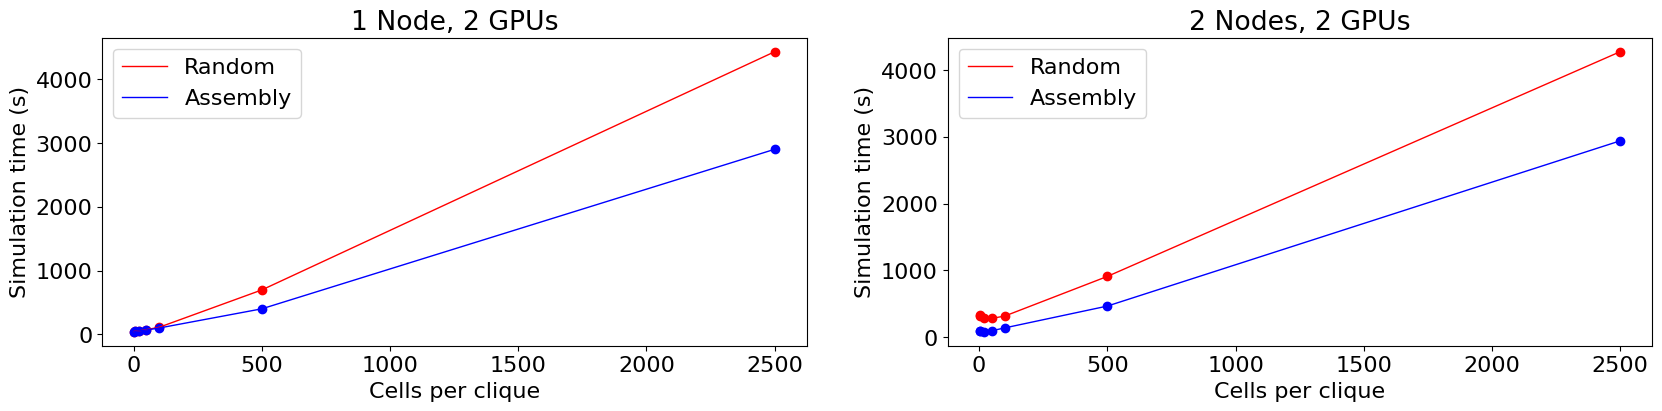

In [116]:
# Cliques

cp_cliques = [2, 4, 20, 50, 100, 500, 2500]

# 1 Node, 2 GPUs
random_12 = [43.3911, 50.8084, 53.8855, 73.2392, 111.167, 696.658, 4433.93]
asm_12 = [40.6635, 48.1079, 53.0052, 67.8, 99.2068, 400.184, 2903.12]

# 2 Nodes, 2 GPUs
random_22 = [310.75, 328.478, 294.028, 282.44, 316.653, 909.867, 4273.23]
asm_22 = [86.1855, 93.4443, 82.1194, 97.3227, 139.403, 466.035, 2938.99]

fig, ax = plt.subplots(1, 2, figsize = (20, 4))

ax[0].plot(cp_cliques, random_12, label = "Random", c = 'red', linewidth = 1)
ax[0].plot(cp_cliques, asm_12, label = "Assembly", c = 'blue', linewidth = 1)
ax[0].scatter(cp_cliques, random_12, c = 'red')
ax[0].scatter(cp_cliques, asm_12, c = 'blue')
ax[0].set_xlabel("Cells per clique")
ax[0].set_ylabel("Simulation time (s)")
ax[0].set_title("1 Node, 2 GPUs")

ax[1].plot(cp_cliques, random_22, label = "Random", c = 'red', linewidth = 1)
ax[1].plot(cp_cliques, asm_22, label = "Assembly", c = 'blue', linewidth = 1)
ax[1].scatter(cp_cliques, random_22, c = 'red')
ax[1].scatter(cp_cliques, asm_22, c = 'blue')
ax[1].set_xlabel("Cells per clique")
ax[1].set_ylabel("Simulation time (s)")
ax[1].set_title("2 Nodes, 2 GPUs")

ax[0].legend()
ax[1].legend()

In [117]:
fig.savefig("conn_effect.svg", format = 'svg', bbox_inches = "tight")

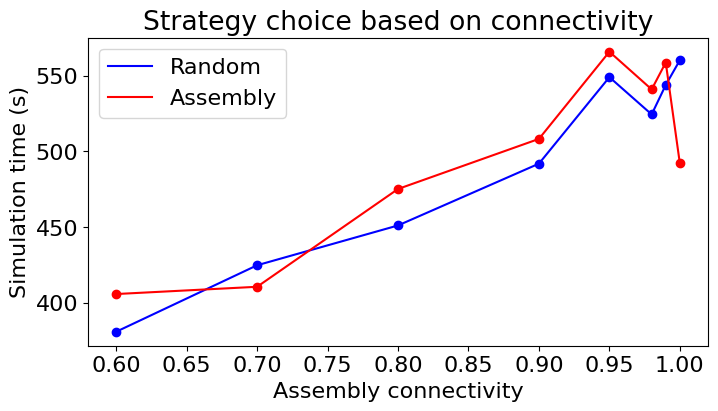

In [123]:
# CN optimization

p = [1, 0.99, 0.98, 0.95, 0.9, 0.8, 0.7, 0.6]
rand = [560.087, 543.746, 524.321, 548.909, 491.83, 451.056, 424.78, 380.921]
asm = [492.028, 558.569, 540.835, 565.695, 508.165, 475.117, 410.579, 405.793]

fig = plt.figure(figsize = (8, 4))
plt.plot(p, rand, c = 'blue', label = 'Random')
plt.scatter(p, rand, c = 'blue')
plt.plot(p, asm, c = 'red', label = 'Assembly')
plt.scatter(p, asm, c = 'red')

plt.ylabel("Simulation time (s)")
plt.title('Strategy choice based on connectivity')
plt.xlabel("Assembly connectivity")

plt.legend()

In [124]:
fig.savefig("strat_choice.svg", format = 'svg', bbox_inches = "tight")

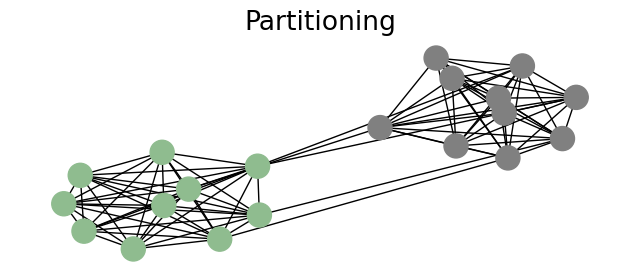

In [137]:
# Partitioning
graphs = []

for graph in ["PING-2-10.txt"]:
    with open(graph, "r") as file:
        lines = file.read()

    G = nx.Graph()
    for line in lines.split("\n"):
        numbers = line.split(",")
        G.add_edge(float(numbers[0]), float(numbers[1]), weight = float(numbers[2]))
    graphs.append(G)


fig, ax = plt.subplots(1, 1, figsize = (8, 3))
nx.draw(graphs[0], ax = ax, node_color = ["gray"] * 10 + ["darkseagreen"] * 10)

ax.set_title("Partitioning")

plt.show()

In [138]:
fig.savefig("part.svg", format = 'svg', bbox_inches = "tight")

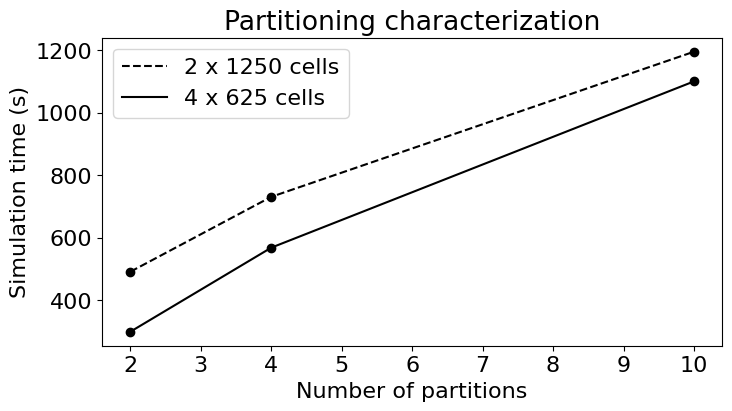

In [143]:
# Partitioning characterization

# Single node characterization
plt.rcParams.update({'font.size': 16})

n_parts = [2, 4, 10]

# 2 x 1250
trace1 = [491.694, 731.146, 1195.2]

# 4 x 625 cells
trace2 = [299.84, 568.596, 1100.3]

fig = plt.figure(figsize = (8, 4))
plt.plot(n_parts, trace1, label = "2 x 1250 cells", ls = '--', c = 'black')
plt.scatter(n_parts, trace1, c = 'black')
plt.plot(n_parts, trace2, label = "4 x 625 cells", ls = '-', c = 'black')
plt.scatter(n_parts, trace2, c = 'black')
plt.ylabel("Simulation time (s)")
plt.xlabel("Number of partitions")
plt.title('Partitioning characterization')
plt.legend()

fig.savefig("single_node_charac.svg", format = 'svg', bbox_inches = "tight")

In [144]:
fig.savefig("part_char.svg", format = 'svg', bbox_inches = "tight")

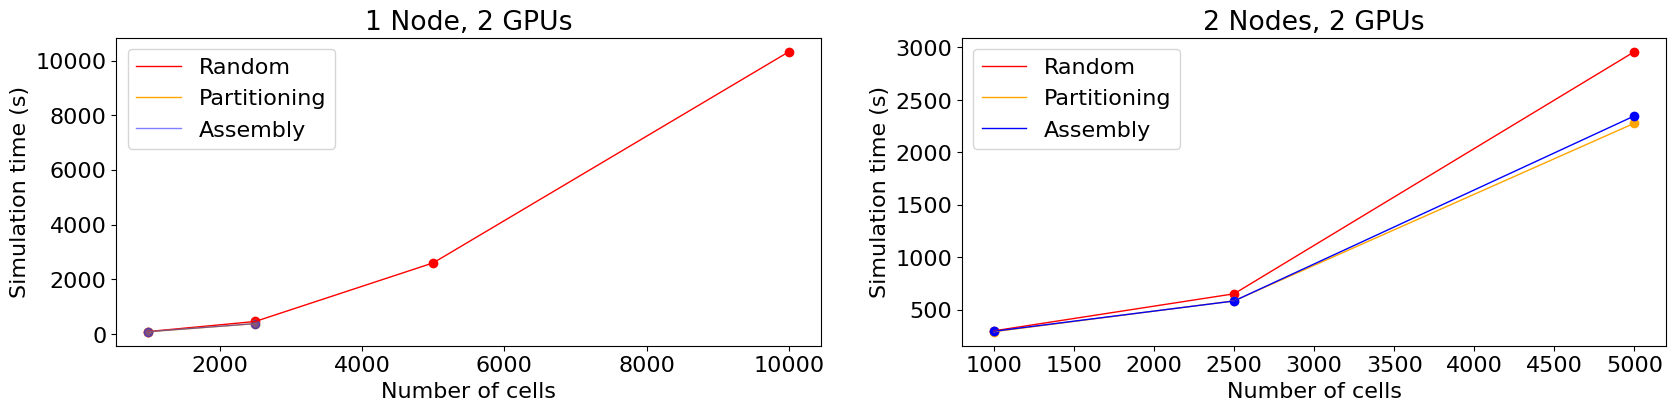

In [149]:
# Comparison of all three

n_cells = [1000, 2500, 5000, 10000]

# 1 Node, 2 GPUs
random_12 = [87.5635, 455.07, 2597.18, 10321.9]
part_12 = [80.9589, 376.415, np.nan, np.nan]
asm_12 = [83.548, 378.473, np.nan, np.nan]

# 2 Nodes, 2 GPUs
random_22 = [298.791, 651.956, 2959.47, np.nan]
part_22 = [290.41, 584.464, 2277.95, np.nan]
asm_22 = [294.703, 583.351, 2347.49, np.nan]

fig, ax = plt.subplots(1, 2, figsize = (20, 4))

ax[0].plot(n_cells, random_12, label = "Random", c = 'red', linewidth = 1)
ax[0].plot(n_cells, part_12, label = "Partitioning", c = 'orange', linewidth = 1)
ax[0].plot(n_cells, asm_12, label = "Assembly", c = 'blue', linewidth = 1, alpha = 0.5)
ax[0].scatter(n_cells, random_12, c = 'red')
ax[0].scatter(n_cells, part_12, c = 'orange')
ax[0].scatter(n_cells, asm_12, c = 'blue', alpha = 0.5)
ax[0].set_xlabel("Number of cells")
ax[0].set_ylabel("Simulation time (s)")
ax[0].set_title("1 Node, 2 GPUs")

ax[1].plot(n_cells, random_22, label = "Random", c = 'red', linewidth = 1)
ax[1].plot(n_cells, part_22, label = "Partitioning", c = 'orange', linewidth = 1)
ax[1].plot(n_cells, asm_22, label = "Assembly", c = 'blue', linewidth = 1)
ax[1].scatter(n_cells, random_22, c = 'red')
ax[1].scatter(n_cells, part_22, c = 'orange')
ax[1].scatter(n_cells, asm_22, c = 'blue')
ax[1].set_xlabel("Number of cells")
ax[1].set_ylabel("Simulation time (s)")
ax[1].set_title("2 Nodes, 2 GPUs")

ax[0].legend()
ax[1].legend()

In [150]:
fig.savefig("comparison_rap.svg", format = 'svg', bbox_inches = "tight")